In [1]:
from vqc.vqc_circuits import *
from cirq.contrib.svg import SVGCircuit

In [2]:
num_qubits = 2
num_layers = 3

uqc = UQC(num_qubits, num_layers)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


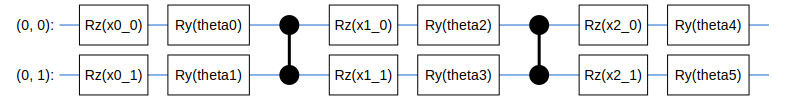

In [3]:
SVGCircuit(uqc.circuit)

In [4]:
uqc.parameters

[theta0, theta1, theta2, theta3, theta4, theta5]

In [5]:
import tensorflow as tf

In [6]:
theta_symbols, input_symbols = uqc.parameters, uqc.inputs

In [7]:
symbols = [str(symb) for symb in theta_symbols + input_symbols]
indices = tf.constant([symbols.index(a) for a in sorted(symbols)])

2023-04-30 15:14:35.627272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.669380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.669455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 15:14:35.670867: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [8]:
state_size = 4

In [9]:
theta_init = tf.random_uniform_initializer(minval=0.0, maxval=np.pi)
theta = tf.Variable(initial_value=theta_init(shape=(1, len(theta_symbols)), dtype="float32"))
print("Thetas", theta)

w_init = tf.random_normal_initializer(mean=0.0, stddev=1)
w = tf.Variable(initial_value = w_init(shape = (num_layers,num_qubits,state_size), dtype = "float32"))
print("W", w)
        
b_init = tf.random_normal_initializer(mean=0.0, stddev=1)
#b_init = tf.random_normal_initializer(mean=0.0, stddev=0.1)
b = tf.Variable(initial_value = b_init(shape = (num_layers,num_qubits), dtype = "float32"))
print("B", b)

Thetas <tf.Variable 'Variable:0' shape=(1, 6) dtype=float32, numpy=
array([[1.0045788 , 2.1837795 , 2.6492646 , 0.9868766 , 0.32571512,
        0.25387233]], dtype=float32)>
W <tf.Variable 'Variable:0' shape=(3, 2, 4) dtype=float32, numpy=
array([[[ 0.40569243, -0.62483126, -0.18749611,  0.81928974],
        [ 1.1096076 , -2.0239332 , -1.2835801 , -0.04816956]],

       [[ 0.5339693 ,  0.7501102 ,  1.0311714 ,  0.7866034 ],
        [-1.9672835 , -0.58688366,  0.90287834, -1.1822499 ]],

       [[ 0.51129156, -0.35648385,  0.70196736,  0.8480966 ],
        [-1.5714412 ,  1.2228214 , -1.2697752 ,  0.54176885]]],
      dtype=float32)>
B <tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.8123364 ,  0.32774994],
       [-1.2374929 ,  1.0792578 ],
       [-1.240873  ,  1.0454992 ]], dtype=float32)>


In [10]:
batch_dim = 1

In [11]:
tiled_up_thetas = tf.tile(tf.multiply(theta,2), multiples=[batch_dim, 1])

In [14]:
inputs = tf.random.uniform(shape = (batch_dim, state_size), minval = 0, maxval = 1)
inputs

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0.77486265, 0.63901734, 0.57549345, 0.45996523]], dtype=float32)>

In [15]:
reshaped_inputs = tf.reshape(inputs, (batch_dim, 1, 1, state_size))
reshaped_inputs

<tf.Tensor: shape=(1, 1, 1, 4), dtype=float32, numpy=
array([[[[0.77486265, 0.63901734, 0.57549345, 0.45996523]]]],
      dtype=float32)>

In [18]:
tiled_inputs = tf.tile(reshaped_inputs, multiples = [1,num_layers, num_qubits,1])
tiled_inputs

<tf.Tensor: shape=(1, 3, 2, 4), dtype=float32, numpy=
array([[[[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]],

        [[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]],

        [[0.77486265, 0.63901734, 0.57549345, 0.45996523],
         [0.77486265, 0.63901734, 0.57549345, 0.45996523]]]],
      dtype=float32)>

In [19]:
inputs_times_weights = tf.reduce_sum(tf.multiply(w,2) * reshaped_inputs, axis = -1, keepdims = False)
inputs_times_weights

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[ 0.3680398, -2.3887663],
        [ 3.696658 , -3.8471932],
        [ 1.924908 , -1.8355987]]], dtype=float32)>

In [20]:
tiled_up_bias = tf.reshape(tf.tile(b, multiples = [batch_dim, 1]), (batch_dim, num_layers, num_qubits))
tiled_up_bias

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-0.8123364 ,  0.32774994],
        [-1.2374929 ,  1.0792578 ],
        [-1.240873  ,  1.0454992 ]]], dtype=float32)>

In [21]:
inputs_times_weights_plus_b = inputs_times_weights + tf.multiply(tiled_up_bias,2)
inputs_times_weights_plus_b

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[-1.256633 , -1.7332664],
        [ 1.221672 , -1.6886775],
        [-0.5568379,  0.2553997]]], dtype=float32)>

In [22]:
reshaped_inputs_times_weights_plus_b = tf.reshape(inputs_times_weights_plus_b, (batch_dim, num_layers * num_qubits))
reshaped_inputs_times_weights_plus_b

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-1.256633 , -1.7332664,  1.221672 , -1.6886775, -0.5568379,
         0.2553997]], dtype=float32)>

In [66]:
uqc.num_qubits

2